# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [4]:
1. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cc = pd.read_csv('/Users/nguyen/Desktop/Spring 24/DS 3001/Data/college_completion.csv',low_memory=False)

In [6]:
2.
shape = cc.shape
print(cc.head())
print(shape)

#3798 observations and 63 variables

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

In [7]:
3.
print(pd.crosstab(cc['control'],cc['level']),'\n')
print(pd.crosstab(cc['control'],cc['level'], normalize = 'all'),'\n')

# Most colleges are private not for profit and 4 year at 31%. Followed by that is public 2 year, probably community college at 24%. The rest are low at around 12%-17%. 

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



<Axes: xlabel='grad_100_value', ylabel='Count'>

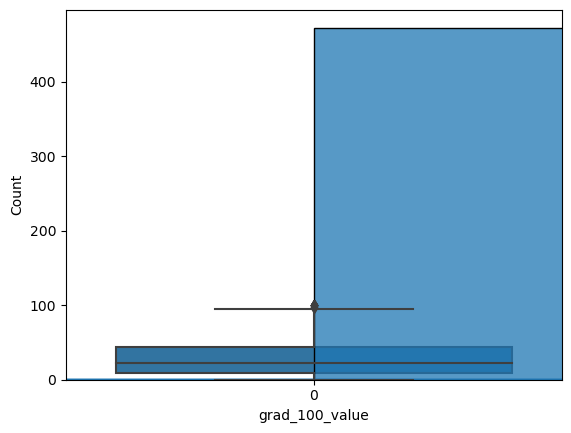

In [9]:
4. 
sns.histplot(cc['grad_100_value'])
sns.kdeplot(cc['grad_100_value'])
sns.boxplot(cc['grad_100_value'])

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  
       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                  

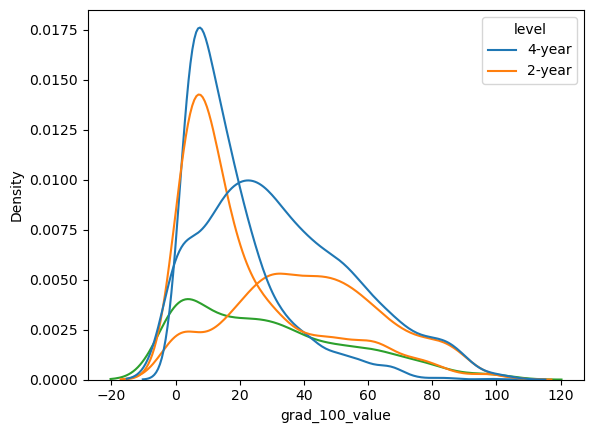

In [15]:
5. 
print(sns.kdeplot(data=cc,x='grad_100_value',hue='control'))

print(sns.kdeplot(data=cc,x='grad_100_value',hue='level'))

print(cc.loc[:,['control','grad_100_value']].groupby('control').describe())

print(cc.loc[:,['level','grad_100_value']].groupby('level').describe())


#4 year institutions and private not for profit rates are highest. In the last question, these two were the most popular as well.  


Axes(0.125,0.11;0.775x0.77)
                              grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200 

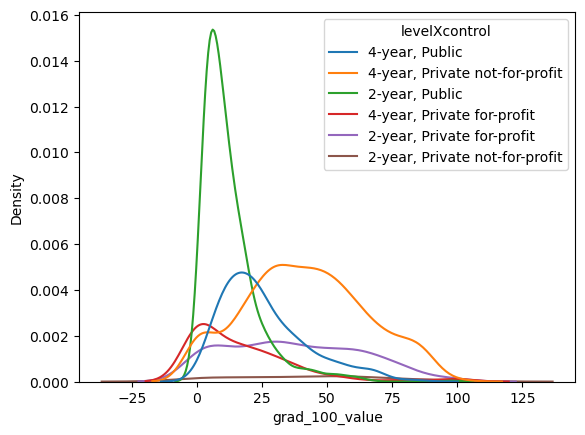

In [16]:
6.
cc['levelXcontrol']=cc['level']+', '+cc['control']
print(sns.kdeplot(data=cc,x='grad_100_value',hue='levelXcontrol'))
print(cc.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe())

#
It seems like private not for profit schools have the highest graduation rates. They're almost equal. 2 year private for profit is over double the 4 year private for profit rate.  

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
       aid_value                                                             \
           count          mean          std    min

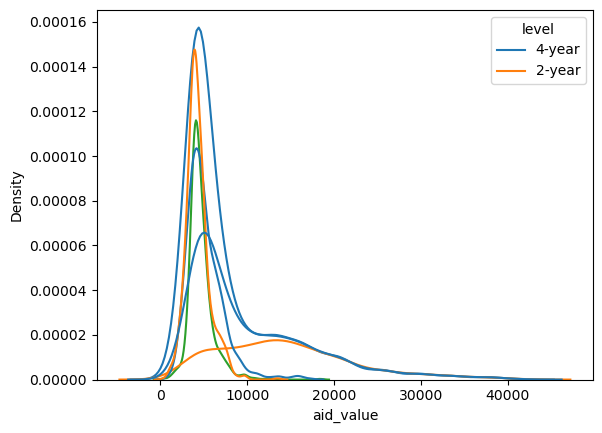

In [26]:
7.
print(sns.kdeplot(data=cc,x='aid_value')) 
print(sns.kdeplot(data=cc,x='aid_value',hue='control'))
print(sns.kdeplot(data=cc,x='aid_value',hue='level'))
print(cc.loc[:,['control','aid_value']].groupby('control').describe())
print(cc.loc[:,['level','aid_value']].groupby('level').describe())


# Private not for profit gives a lot more aid, almost tripe the two others. Private for profit and public give similar amounts. 

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


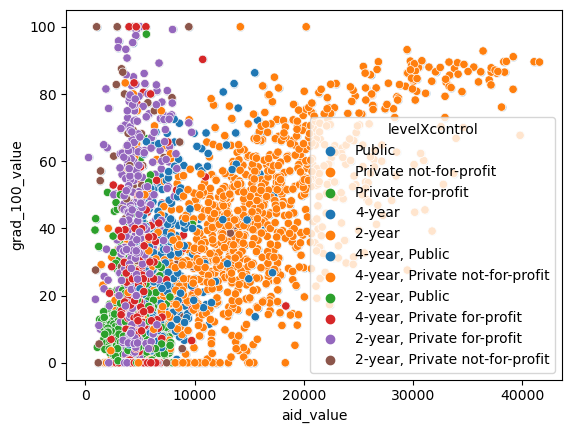

In [28]:
8.

print(sns.scatterplot(data=cc,x='aid_value',y='grad_100_value'))

# The curve starts off steep, and get shallower towards the end. There is also a trend of grad_100_value increasing while aid_value stays stagnant. 

print(sns.scatterplot(data=cc,x='aid_value',y='grad_100_value',hue='control'))

print(sns.scatterplot(data=cc,x='aid_value',y='grad_100_value',hue='level'))

print(sns.scatterplot(data=cc,x='aid_value',y='grad_100_value',hue='levelXcontrol'))

#
Only 4 year Non for profit institutions have a positively correlated relationship with aid_value. All of the other institutions have crazy graduation rates while not giving much aid. This is really cool to visualize and see what the magnitude is. 

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [ ]:
1. 

#I'm using a "Medicare Telehealth Trends" dataset. Link: https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/medicare-telehealth-trends

In [ ]:
2. 

#The data dictionary does not document how missings are handled. It does say that there is a "missing data category," but doesn't mention or references it anywhere else. I still can't find it. 
#For categorical variables such as beneficiary race and ethnicity description, the document does describe the possible values that the variables can take. As for missing variables, some variables mention a missing variables category but I'm not sure where to find it. 
#For the numeric variables, it does not explicity document how the missings are handled, but the variables classify the sample space pretty well. For example, there are many variables that capture the total amount.
#Overall, this data dictionary provides an extensive overview of the variable meanings, classifications, and methods for counting and categorizing data. 

3.

"Bene_Race_Description" and "Bene_RUCA_Dec"
This compares beneficary race to beneficiary rural or urban status. These two variables tell us a lot about the general trends of the beneficiaries, who they are, and where they live. 

"Total_Bene_Telehealth" and "Total_PartB_Enrl"
This compares the total amount of telehealth users to total medicare part b enrollment. This will show us the rate of adoption of medicare and how deep people are in the program.


In [31]:
#Cleaning Data

mc = pd.read_csv('/Users/nguyen/Desktop/Spring 24/DS 3001/Data/TMEDTREND_PUBLIC_231122.csv',low_memory=False)
cleaned_data = mc.dropna(subset=['Total_Bene_Telehealth', 'Total_PartB_Enrl'])
cleaned_missing_values = cleaned_data[['Total_Bene_Telehealth', 'Total_PartB_Enrl']].isnull().sum()
cleaned_missing_values

To clean the data I just removed the NA values. 

Total_Bene_Telehealth    0
Total_PartB_Enrl         0
dtype: int64

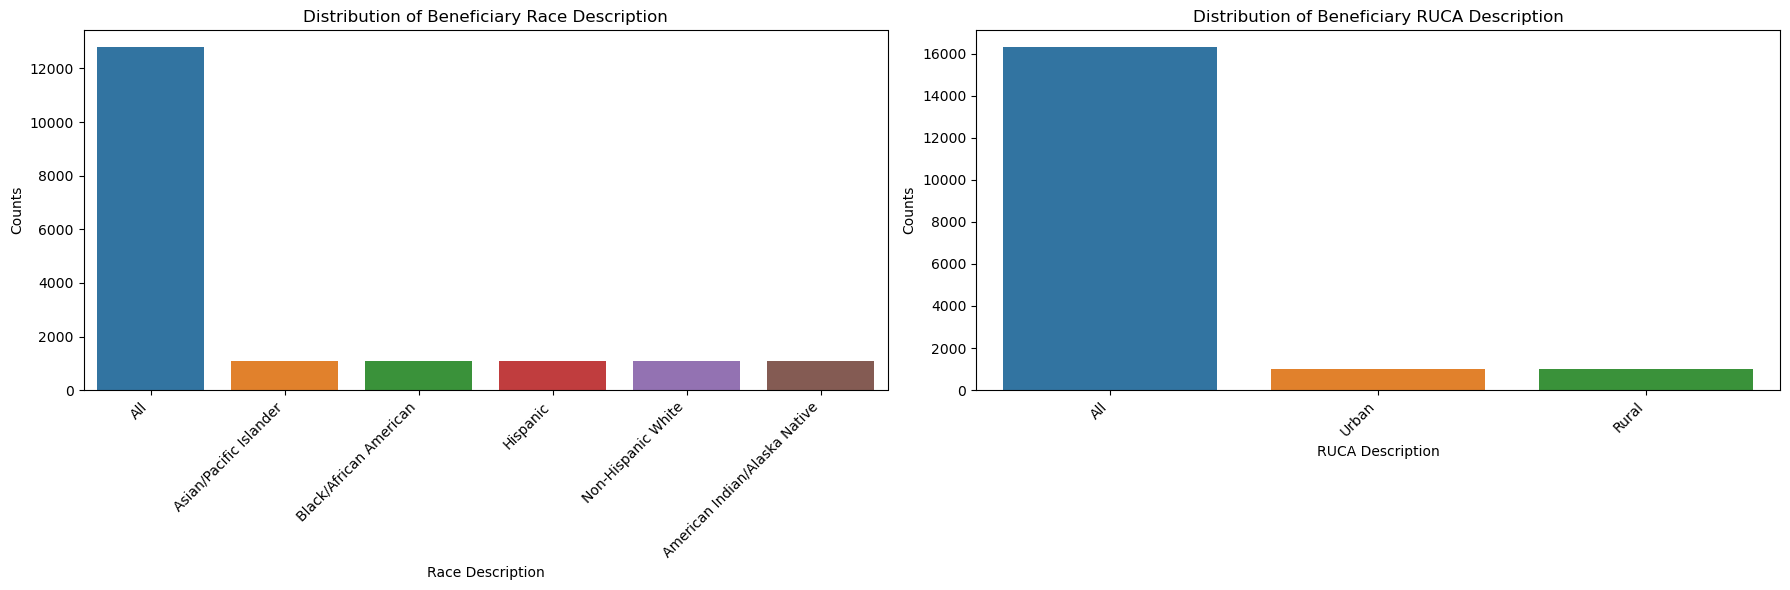

In [34]:
4.
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
race_counts = cleaned_data['Bene_Race_Desc'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values, ax=ax[0])
ax[0].set_title('Distribution of Beneficiary Race Description')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Race Description')
ruca_counts = cleaned_data['Bene_RUCA_Desc'].value_counts()
sns.barplot(x=ruca_counts.index, y=ruca_counts.values, ax=ax[1])
ax[1].set_title('Distribution of Beneficiary RUCA Description')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('RUCA Description')
plt.tight_layout()
plt.show()

#There are no outliers. The data seems normal here. A pretty even distribution between ruce and RUCA.

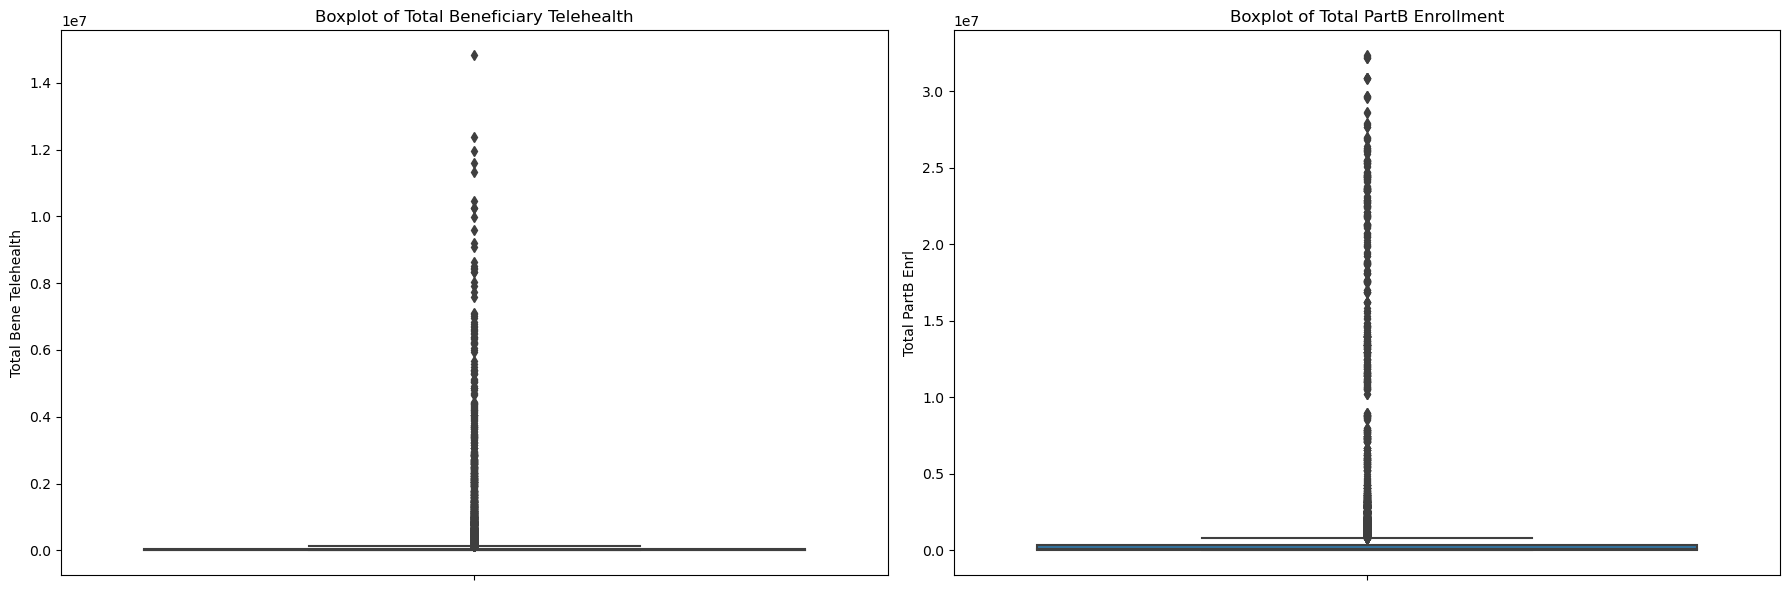

In [33]:
4.
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(y=cleaned_data['Total_Bene_Telehealth'], ax=ax[0])
ax[0].set_title('Boxplot of Total Beneficiary Telehealth')
ax[0].set_ylabel('Total Bene Telehealth')
sns.boxplot(y=cleaned_data['Total_PartB_Enrl'], ax=ax[1])
ax[1].set_title('Boxplot of Total PartB Enrollment')
ax[1].set_ylabel('Total PartB Enrl')
plt.tight_layout()
plt.show()


#There are a few high outliers in the total beneficiary telehealth graph. The PartB boxplot data is more spread out, but still has a few high outliers. 

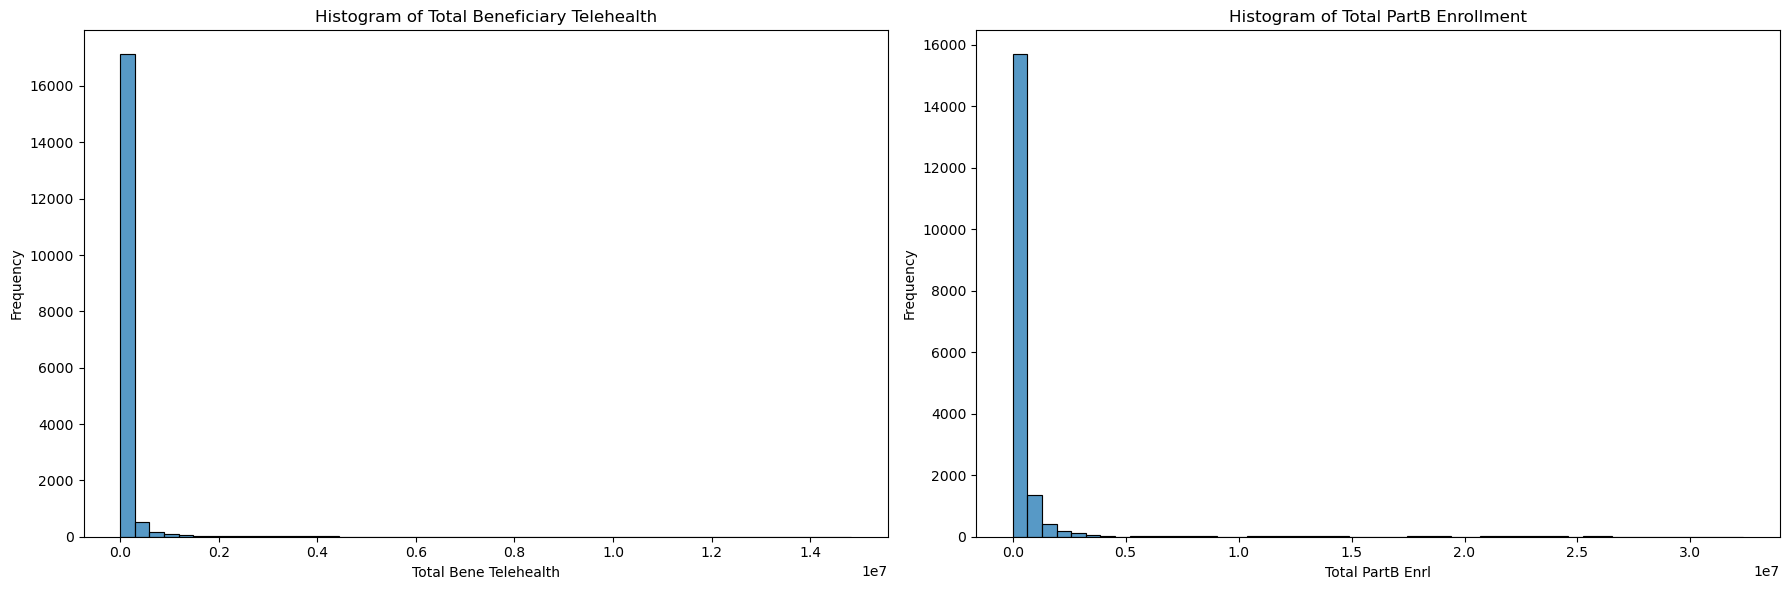

In [35]:
5.
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(cleaned_data['Total_Bene_Telehealth'], bins=50, ax=ax[0])
ax[0].set_title('Histogram of Total Beneficiary Telehealth')
ax[0].set_xlabel('Total Bene Telehealth')
ax[0].set_ylabel('Frequency')
sns.histplot(cleaned_data['Total_PartB_Enrl'], bins=50, ax=ax[1])
ax[1].set_title('Histogram of Total PartB Enrollment')
ax[1].set_xlabel('Total PartB Enrl')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#The data is right skewed meaning many people don't use telehealth services, and not mant people are enrolled in Part B. As for transformations, applying a logarithm could help normalize the data. 

/var/folders/0n/f313dyfn1c5cywk5yb3257gr0000gn/T/ipykernel_4952/2045849561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Log_Total_Bene_Telehealth'] = np.log1p(cleaned_data['Total_Bene_Telehealth'])
/var/folders/0n/f313dyfn1c5cywk5yb3257gr0000gn/T/ipykernel_4952/2045849561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Log_Total_PartB_Enrl'] = np.log1p(cleaned_data['Total_PartB_Enrl'])


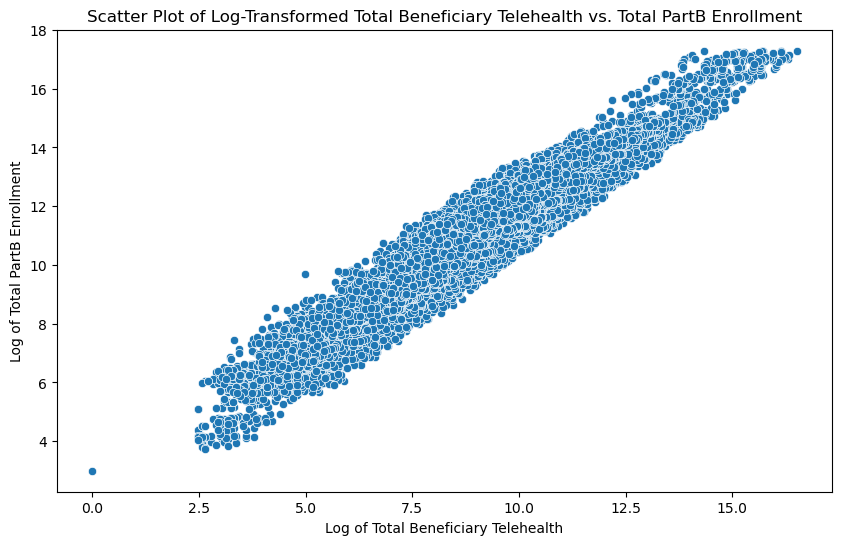

In [38]:
6.
cleaned_data['Log_Total_Bene_Telehealth'] = np.log1p(cleaned_data['Total_Bene_Telehealth'])
cleaned_data['Log_Total_PartB_Enrl'] = np.log1p(cleaned_data['Total_PartB_Enrl'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Total_Bene_Telehealth', y='Log_Total_PartB_Enrl', data=cleaned_data)
plt.title('Scatter Plot of Log-Transformed Total Beneficiary Telehealth vs. Total PartB Enrollment')
plt.xlabel('Log of Total Beneficiary Telehealth')
plt.ylabel('Log of Total PartB Enrollment')
plt.show()

#There is a prominent positively correlated relationship between these two variables. As total enrollment for PartB increases, total telehealth beneficiaries also do.


In [39]:
7.
descriptive_stats = cleaned_data[['Total_Bene_Telehealth', 'Total_PartB_Enrl']].describe()
print(descriptive_stats)

#Here, I see the trends of both numeric data in text. Both data have wide ranges signifying that there are outliers. Both data also has lower median than mean, signifying the right skew. 

       Total_Bene_Telehealth  Total_PartB_Enrl
count           1.827600e+04      1.827600e+04
mean            1.212833e+05      6.479060e+05
std             5.569033e+05      2.626600e+06
min             0.000000e+00      1.900000e+01
25%             3.656750e+03      2.393425e+04
50%             1.505850e+04      1.048225e+05
75%             5.280475e+04      3.427452e+05
max             1.482693e+07      3.234595e+07
